In [14]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

data_path = 'data/'
df_train = pd.read_csv(data_path + 'house_train.csv.gz')

train_Y = np.log1p(df_train['SalePrice'])
df = df_train.drop(['Id', 'SalePrice'] , axis=1)
df.head()
df_train['SalePrice'].shape[0]

1460

In [15]:
num_features = []
for dtype, feature in zip(df.dtypes, df.columns):
    if dtype == 'float64' or dtype == 'int64':
        num_features.append(feature)
print(f'{len(num_features)} Numeric Features : {num_features}\n')

36 Numeric Features : ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']



In [16]:
df = df[num_features]
df = df.fillna(-1)
MMEncoder = MinMaxScaler()
train_num = train_Y.shape[0]
df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,548,0,61,0,0,0,0,0,2,2008
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,460,298,0,0,0,0,0,0,5,2007
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,608,0,42,0,0,0,0,0,9,2008
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,642,0,35,272,0,0,0,0,2,2006
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,836,192,84,0,0,0,0,0,12,2008


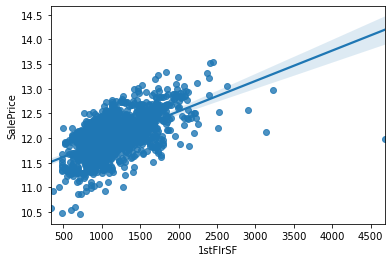

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.regplot(x = df['1stFlrSF'], y=train_Y)
plt.show()

In [24]:
train_X = MMEncoder.fit_transform(df)
estimator = LinearRegression()
cross_val_score(estimator, train_X, train_Y, cv=5).mean()

0.883944358335636

In [30]:
print(train_X)

[[0.23529412 0.36065574 0.04273117 ... 0.         0.09090909 0.5       ]
 [0.         0.44262295 0.04977847 ... 0.         0.36363636 0.25      ]
 [0.23529412 0.37704918 0.05988982 ... 0.         0.72727273 0.5       ]
 ...
 [0.29411765 0.36612022 0.046359   ... 0.16129032 0.36363636 1.        ]
 [0.         0.37704918 0.05049546 ... 0.         0.27272727 1.        ]
 [0.         0.41530055 0.05184364 ... 0.         0.45454545 0.5       ]]


In [19]:
print(np.percentile(df['1stFlrSF'],3))
print(np.percentile(df['1stFlrSF'],97))

625.0
1981.6100000000001


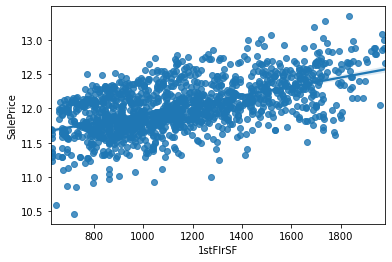

In [22]:
#作業1
df['1stFlrSF'] = df['1stFlrSF'].clip(625,1981.6)
sns.regplot(x = df['1stFlrSF'], y=train_Y)
plt.show()

In [31]:
train_X = MMEncoder.fit_transform(df)
estimator = LinearRegression()
cross_val_score(estimator, train_X, train_Y, cv=5).mean()

0.883944358335636

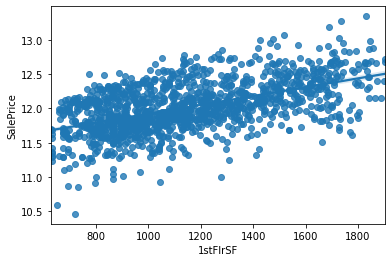

In [42]:
#作業2
keep_range = (df['1stFlrSF']>625) & (df['1stFlrSF']<1981.6)
df = df[keep_range]
train_Y = train_Y[keep_range]
sns.regplot(x = df['1stFlrSF'], y = train_Y)
plt.show()

In [43]:
train_X = MMEncoder.fit_transform(df)
estimator = LinearRegression()
cross_val_score(estimator, train_X, train_Y, cv=5).mean()

0.8803905418667164